# Analiza Visitorjev

In [2]:
import pandas as pd
import os.path
import re
from statistics import mean
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.colors import LinearSegmentedColormap


# pd.options.display.max_rows = 10
#%matplotlib notebook
%matplotlib inline

# naložimo razpredelnico, s katero bomo delali
pot_do_Visitorjev = os.path.join("immadegen.csv")
visitorji = pd.read_csv(pot_do_Visitorjev)
visitorji = visitorji.set_index('Name')

## Obdelava podatkov

In [3]:
visitorji

,Background,Clothing,Expression,Eyes,Eyewear,Head,Mouth,Neck,Nose,Skin,Type,Price
Name,,,,,,,,,,,,
Visitor1,Pink,NaN,Delusional,Visitor,NaN,Barbarian,Face Mask,Gold Necklace,NaN,Green,Not for sale,NaN
Visitor2,Pink,Black T-shirt,Surprised,Twirl,Eyepatch,NaN,NaN,NaN,NaN,Blue,Buy,5.000
Visitor3,Purple,Mariniere,Surprised,Lime,Aviators,Bucket Hat,Face Mask,NaN,NaN,War Paint,Not for sale,NaN
Visitor4,Green,NaN,Surprised,Navy,Round Glasses,Bolero,Gagged,NaN,Gold Brow Stud,Blue,Not for sale,NaN
Visitor5,Red,Hoodie Down,Confident,Stoned,Round Glasses,Barbarian,Pipe,NaN,Silver Brow Stud,Blue,Not for sale,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
Visitor9995,Green,Suit,Surprised,White,Skelly,Do Rag,Fangs,NaN,Clown,Green,Buy,10.000
Visitor9996,Purple,Hoodie With Jacket,Surprised,Lime,NaN,Top Hat,NaN,NaN,Silver Brow Stud,Cyberpunk,Buy,1.000
Visitor9997,Purple,Suit,Tired,Navy,Monocle,Floppy Hat,Gagged,NaN,Silver Brow Stud,Trippy,Not for sale,NaN


In [4]:
lastnosti = visitorji.columns


## Analiza

Ugotvljanje pogostosti lastnosti

In [5]:
for lastnost in lastnosti:
    vars()[lastnost] = round(visitorji[lastnost].value_counts()/9999*100, 2)


Za prikaz pogostosti lastnosti spodaj izberite ustrezno kategorijo

In [262]:
Skin

Blue            23.64
Green           20.73
Red             10.22
Trippy           7.09
War Paint        5.92
Cyberpunk        5.76
Cyborg           5.65
Silver           5.30
Tats             4.14
Poison           3.18
Gold             3.04
Glowing Tats     2.19
Joker            2.16
Translucent      0.97
Name: Skin, dtype: float64

Na spodnjem grafu lahko vidimo, da večina Visitorjev ni na prodaj. Pri naši analizi pa bomo v glavnem uporabljali presotali delež.

<AxesSubplot:ylabel='Type'>

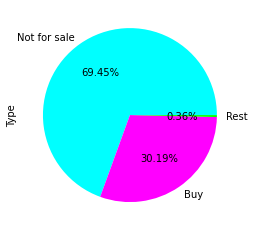

In [6]:
prikaz_tipa = Type[Type>1]
prikaz_tipa['Rest'] = Type[Type <= 1].sum()

prikaz_tipa.plot.pie(autopct = "%.2f%%", colors = ['aqua', 'fuchsia', 'lime'])



##### Ugotavljanje pomembnosti ozadja

In [4]:
buy = visitorji.loc[visitorji['Type'] == 'Buy']
top_bid = visitorji.loc[visitorji['Type'] == 'Top bid']
min_bid = visitorji.loc[visitorji['Type'] == 'Min bid']

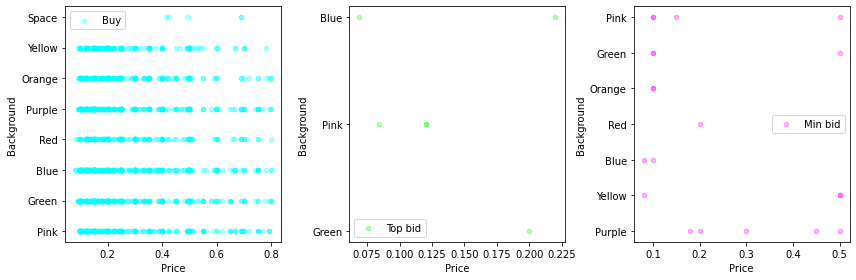

In [5]:
buy_min = buy['Price'].min()
top_bid_min = top_bid['Price'].min()
min_bid_min = min_bid['Price'].min()

fig, (ax1, ax2, ax3) = plt.subplots(1,3, figsize=(12,4)) 
buy.loc[visitorji['Price'] < 10*buy_min].plot.scatter('Price', 'Background', alpha=0.3, color = 'aqua', ax=ax1, label = 'Buy')
top_bid.loc[visitorji['Price'] < 10*top_bid_min].plot.scatter('Price', 'Background', alpha=0.3, color = 'lime', ax=ax2, label = 'Top bid')
min_bid.loc[visitorji['Price'] < 10*min_bid_min].plot.scatter('Price', 'Background', alpha=0.3, color = 'fuchsia', ax=ax3, label = 'Min bid')
plt.tight_layout()


Ker NFTji niso dolgo na trgu, v zgornjih grafih ni smiselno primerjati cen pri različnih vrstah prodaj, temveč katera barva izstopa na posameznem grafu. Na prvem grafu lahko vidimo, da vse barve ozadij razen vesoljskega približno enako doprinesejo k vrednosti. To je tudi smiselno, saj je vesoljsko ozadje najredkejše. Zanimivo je, da se na Min bid za rdeče in vijolično ozadje zahteva več od ostalih, kar pa je lahko posledica majhnega vzorca.

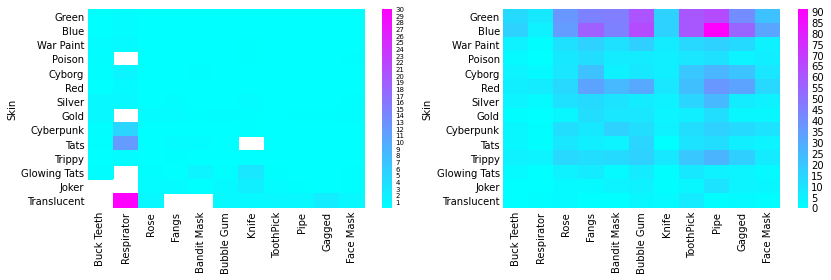

In [6]:
# naredimo tabelo primerno za heatmap
koza = visitorji['Skin'].unique()
usta = visitorji['Mouth'].unique().tolist()
del usta[1]

#buy.groupby(['Skin', 'Mouth']).size()
df_cena = pd.DataFrame(koza, columns = ['Skin'])
df_kolicina = pd.DataFrame(koza, columns = ['Skin'])
#poiscimo najnizjo ceno in stevilo ujemanj

for us in usta: 
    stolpec_cena = []
    stolpec_kolicina = []
    for ko in koza:
        stolpec_kolicina.append(len(buy.loc[(buy['Skin'] == ko) & (buy['Mouth'] == us)].index))
        stolpec_cena.append(buy.loc[(buy['Skin'] == ko) & (buy['Mouth'] == us)]['Price'].min())
    df_kolicina.insert(1, us, stolpec_kolicina, True)
    df_cena.insert(1, us, stolpec_cena, True)
    
df_kolicina = df_kolicina.set_index('Skin')
df_cena = df_cena.set_index('Skin')


fig, (ax1, ax2) = plt.subplots(1,2, figsize=(12,4)) 
ax = sns.heatmap(df_cena, cmap = 'cool', ax=ax1) #, mask=df_cena > 5
#sns.heatmap(df_cena, mask=df_cena <= 5, cmap='winter', cbar=False, ax=ax1)
ax.tick_params(axis='both', which='both', length=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=7, axis='both', which='both', length=0)
cbar.set_ticks(np.linspace(0, 30, 31))


ax = sns.heatmap(df_kolicina, cmap = 'cool', ax=ax2)
ax.tick_params(axis='both', which='both', length=0)

cbar = ax.collections[0].colorbar
cbar.ax.tick_params(labelsize=10, axis='both', which='both', length=0)
cbar.set_ticks(np.linspace(0, 90, 19))

plt.tight_layout()


### Ogled NFTjev, ki niso na prodaj

V tem delu analize bom poskusila najti kakšno lastnost, ki jo lastniki ne želijo prodati, temveč želijo tak NFT obdržati zase.

In [85]:
niso_na_prodaj = visitorji.loc[visitorji['Type'] == 'Not for sale']
ostali = visitorji.loc[visitorji['Type'] != 'Not for sale']

In [131]:
a = niso_na_prodaj.groupby('Eyes').count()
b = visitorji.groupby('Eyes').count()['Background']
s = pd.DataFrame(a['Background'])
s.insert(1, 'Bg', b, True)

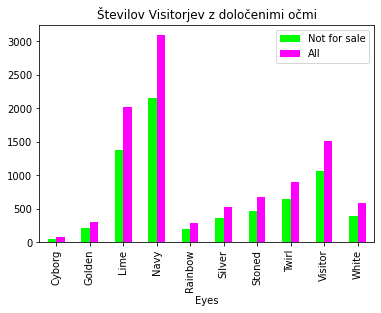

In [130]:
s.plot(kind='bar', y = ['Background', 'Bg'], title = 'Številov Visitorjev z določenimi očmi', color = ['lime', 'fuchsia'])
plt.legend(["Not for sale", "All"])

S pomočjo zgornjega grafa sem ugotovila, da ni nobene vrste oči, ki bi jo lastniki v splošnem raje zadržali, kot prodali.

In [138]:
### se ksno na isti nacin samo da je kolacnik